# 1. Split into train, test, validation

For creating a training, testing and validation dataset from UTKFace csv file with equal female/male ratio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# load X and y from csv data
data = pd.read_csv('age_gender.csv')
print(data.shape)

# Age: 1,...,116
# Ethnicity: 0:white, 1:black, 2:asian, 3:indian, 4:others
# Gender: 0:male, 1:female
y = data[['age', 'ethnicity', 'gender']]
X = data['pixels']

(23705, 5)
(23705,)
(23705, 3)


In [35]:
# get female/male indices for same female/male ratio
y_gen = y['gender'].values
idx_m = np.where(y_gen == 0)[0]
idx_f = np.where(y_gen == 1)[0]

# split ratio
split = 0.8

# method to split an input array of indices (id_arr) into train, test and val set of indices with split_ratio
def split_set_id(id_arr, split_ratio):
    
    # split indices
    test_split = round(((1-split_ratio)*len(id_arr)))
    val_split = round(test_split+(0.8*0.2)*len(id_arr))
    
    # randomize array of indices
    np.random.seed(0)
    np.random.shuffle(id_arr)
    
    # get array of indices for each set (test, val, train)
    id_test = id_arr[:test_split]
    id_val = id_arr[test_split:val_split]
    id_train = id_arr[val_split:]
    
    # return numpy array of indices for each set
    return id_train, id_test, id_val

# split male indices into train, test and val 
id_train_m, id_test_m, id_val_m = split_set_id(idx_m, split_ratio=split)
# split female indices into train, test and val 
id_train_f, id_test_f, id_val_f = split_set_id(idx_f, split_ratio=split)

# merge female and male indices, for receiving train, test and val indices array
id_train = np.concatenate((id_train_m,id_train_f))
id_test = np.concatenate((id_test_m,id_test_f))
id_val = np.concatenate((id_val_m,id_val_f))

total male:12391
train:7930
test:2478
val:1983
total female:11314
train:7241
test:2263
val:1810


In [ ]:
# train set
x_train = x[id_train]
ya_train = data['age'].values[id_train]
ye_train = data['ethnicity'].values[id_train]
yg_train = data['gender'].values[id_train]
yn_train = data['img_name'].values[id_train]

# test set
x_test = x[id_test]
ya_test = data['age'].values[id_test]
ye_test = data['ethnicity'].values[id_test]
yg_test = data['gender'].values[id_test]
yn_test = data['img_name'].values[id_test]

# val set
x_val = x[id_val]
ya_val = data['age'].values[id_val]
ye_val = data['ethnicity'].values[id_val]
yg_val = data['gender'].values[id_val]
yn_val = data['img_name'].values[id_val]

age = [ya_train, ya_test, ya_val]
eth = [ye_train, ye_test, ye_val]
gen = [yg_train, yg_test, yg_val]
nam = [yn_train, yn_test, yn_val]

# create new csv data
csv_filename = ['train.csv', 'test.csv', 'val.csv']
for i in range(3):

    # dictionary of lists  
    for n in range(len(nam[i])):
        # new filename (disgard old misguided filenames)
        new_name = str(age[i][n])+'_'+str(gen[i][n])+'_'+str(eth[i][n])+'_'+nam[i][n]
        nam[i][n] = new_name
    
    # save ad dictionary
    dict = {'age': age[i], 'ethnicity': eth[i], 'gender': gen[i], 'img_name':nam[i]}  
    
    # create pandas dataframe
    df = pd.DataFrame(dict) 

    # saving the dataframe 
    df.to_csv(csv_filename[i],index=False) 

In [ ]:
# visualize example
traindata = pd.read_csv('train.csv')
traindata.head()

In [43]:
# create csv data with and save
pd_train = pd.DataFrame(id_train)
pd_test = pd.DataFrame(id_test)
pd_val = pd.DataFrame(id_val)
pd_train.to_csv('train.csv', index=False, header=False)
pd_test.to_csv('test.csv', index=False, header=False)
pd_val.to_csv('val.csv', index=False, header=False)

# 2. Load sets

Load train, test and validation data from csv indices file

In [173]:
# get indices arrays of train, test, val
id_train = np.squeeze(pd.read_csv('train.csv', header=None).values)
id_test = np.squeeze(pd.read_csv('test.csv', header=None).values)
id_val = np.squeeze(pd.read_csv('val.csv', header=None).values)

# get complete dataset and load
data = pd.read_csv('age_gender.csv')
X = data['pixels']
x = [list(map(int, i.split())) for i in X]
x = np.asarray(x)
x = x.reshape(-1,48,48)

# train set
x_train = x[id_train]
ya_train = data['age'].values[id_train]
ye_train = data['ethnicity'].values[id_train]
yg_train = data['gender'].values[id_train]

# test set
x_test = x[id_test]
ya_test = data['age'].values[id_test]
ye_test = data['ethnicity'].values[id_test]
yg_test = data['gender'].values[id_test]

# val set
x_val = x[id_val]
ya_val = data['age'].values[id_val]
ye_val = data['ethnicity'].values[id_val]
yg_val = data['gender'].values[id_val]

# 3. Label distribution analysis for each set

Analyse the distributions of age, ethnicity and gender in each set.

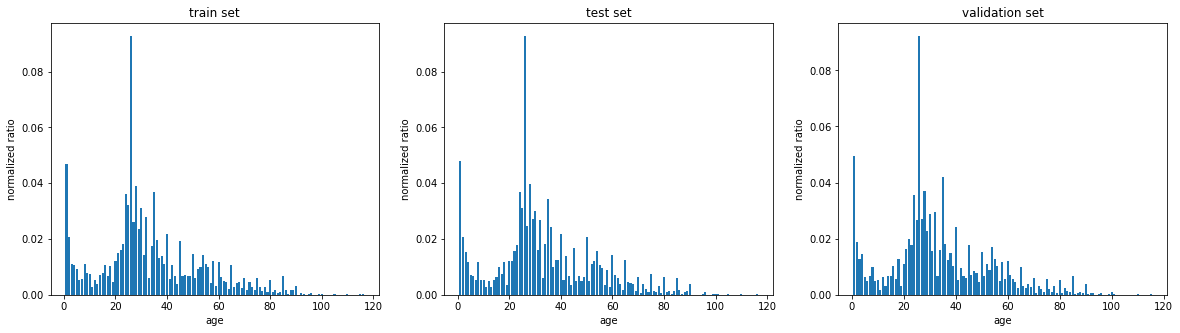

In [212]:
# visualize the age distribution of train, test and validation set
sets = [ya_train, ya_test, ya_val]
nb_sets = len(sets)
title_set = ['train set', 'test set', 'validation set']
f, axs = plt.subplots(1,nb_sets)
for nb_s in range(nb_sets):
    ya_uni, ya_coun = np.unique(sets[nb_s], return_counts=True)
    axs[nb_s].bar(ya_uni, ya_coun/len(sets[nb_s]))
    axs[nb_s].set_title(title_set[nb_s])
    axs[nb_s].set_xlabel('age')
    axs[nb_s].set_ylabel('normalized ratio')
f.set_size_inches(20,5)
plt.show()

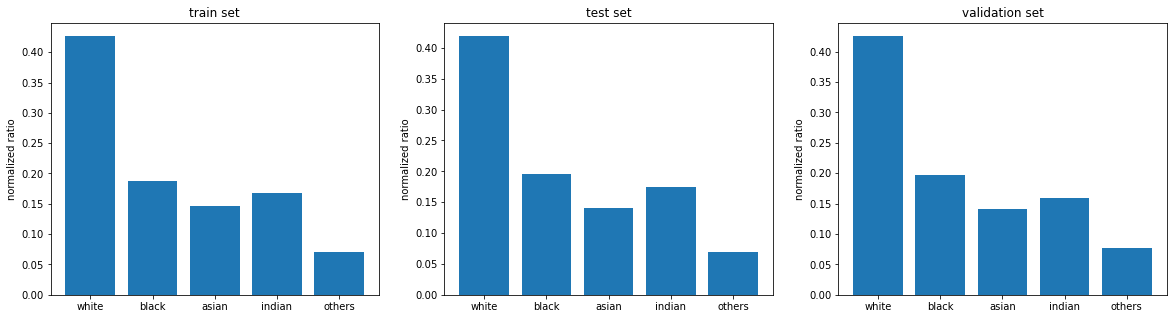

In [211]:
# visualize the ethnicity distribution of train, test and validation set
sets = [ye_train, ye_test, ye_val]
nb_sets = len(sets)
title_set = ['train set', 'test set', 'validation set']
label_eth = ['white', 'black', 'asian', 'indian', 'others']
l_pos = np.arange(len(label_eth))
f, axs = plt.subplots(1,nb_sets)
for nb_s in range(nb_sets):
    ye_uni, ye_coun = np.unique(sets[nb_s], return_counts=True)
    axs[nb_s].bar(ye_uni, ye_coun/len(sets[nb_s]))
    axs[nb_s].set_title(title_set[nb_s])
    axs[nb_s].set_xticks(l_pos)
    axs[nb_s].set_xticklabels(label_eth)
    axs[nb_s].set_ylabel('normalized ratio')
f.set_size_inches(20,5)
plt.show()

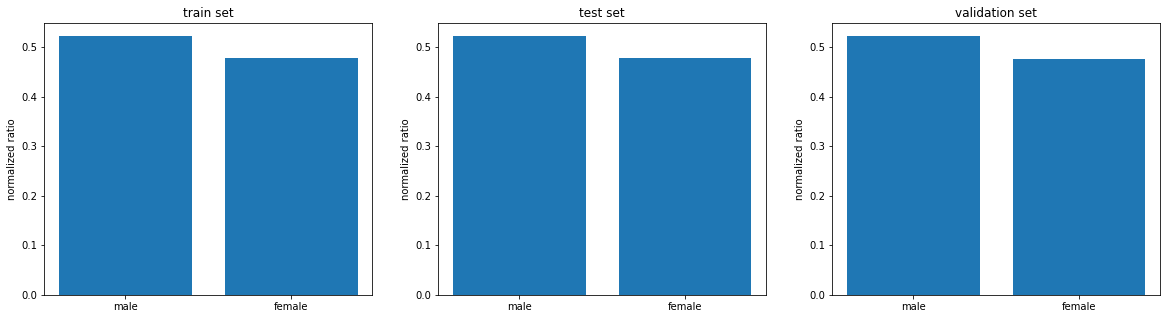

In [213]:
# visualize the gender distribution of train, test and validation set
sets = [yg_train, yg_test, yg_val]
nb_sets = len(sets)
title_set = ['train set', 'test set', 'validation set']
label_gen = ['male', 'female']
l_pos = np.arange(len(label_gen))
f, axs = plt.subplots(1,nb_sets)
for nb_s in range(nb_sets):
    yg_uni, yg_coun = np.unique(sets[nb_s], return_counts=True)
    axs[nb_s].bar(yg_uni, yg_coun/len(sets[nb_s]))
    axs[nb_s].set_title(title_set[nb_s])
    axs[nb_s].set_xticks(l_pos)
    axs[nb_s].set_xticklabels(label_gen)
    axs[nb_s].set_ylabel('normalized ratio')
f.set_size_inches(20,5)
plt.show()

# 4. Samples

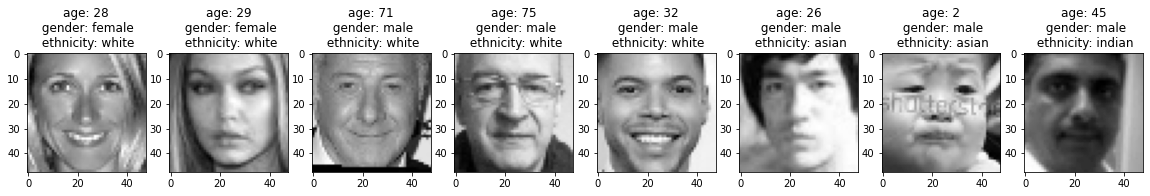

In [193]:
# visualize train data examples 
nb = 8
ran_id = np.random.randint(0,len(x_train),nb)
f, axs = plt.subplots(1,nb)
label_gen = ['male', 'female']
label_eth = ['white', 'black', 'asian', 'indian', 'others']
for n in range(nb):
    axs[n].imshow(x_train[ran_id[n]], cmap="gray")
    axs[n].set_title('age: '+str(ya_train[ran_id[n]])
                     +'\n gender: '+label_gen[yg_train[ran_id[n]]]
                     +'\n ethnicity: '+label_eth[ye_train[ran_id[n]]])

f.set_size_inches(20,5)
plt.show()

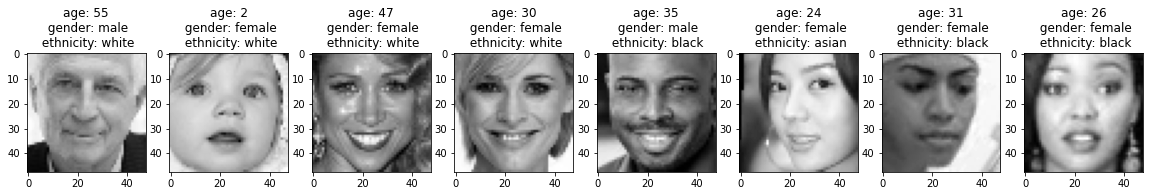

In [215]:
# visualize test data examples 
nb = 8
ran_id = np.random.randint(0,len(x_test),nb)
f, axs = plt.subplots(1,nb)
label_gen = ['male', 'female']
label_eth = ['white', 'black', 'asian', 'indian', 'others']
for n in range(nb):
    axs[n].imshow(x_test[ran_id[n]], cmap="gray")
    axs[n].set_title('age: '+str(ya_test[ran_id[n]])
                     +'\n gender: '+label_gen[yg_test[ran_id[n]]]
                     +'\n ethnicity: '+label_eth[ye_test[ran_id[n]]])

f.set_size_inches(20,5)
plt.show()

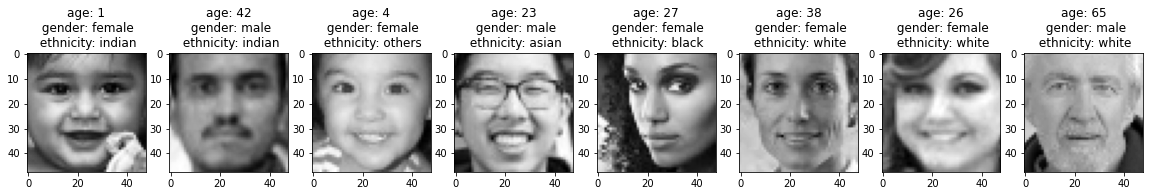

In [216]:
# visualize val data examples 
nb = 8
ran_id = np.random.randint(0,len(x_val),nb)
f, axs = plt.subplots(1,nb)
label_gen = ['male', 'female']
label_eth = ['white', 'black', 'asian', 'indian', 'others']
for n in range(nb):
    axs[n].imshow(x_val[ran_id[n]], cmap="gray")
    axs[n].set_title('age: '+str(ya_val[ran_id[n]])
                     +'\n gender: '+label_gen[yg_val[ran_id[n]]]
                     +'\n ethnicity: '+label_eth[ye_val[ran_id[n]]])

f.set_size_inches(20,5)
plt.show()